In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "../data/raw/01_supermercados.csv"

df = pd.read_csv(path, sep=',', encoding='latin-1')

print(f'Tamanho da base: {df.shape[0]} registros e {df.shape[1]} variáveis')

print(f'Variáveis: {list(df.columns)}')

print(df.dtypes)

df.tail(10)

Tamanho da base: 9994 registros e 21 variáveis
Variáveis: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10/3/2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
dados_nulos = df.isnull().sum()


tabela_nulos = pd.DataFrame({
    'Nome da Variável': dados_nulos.index,
    'Quantidade de Dados Nulos': dados_nulos.values
})


print(tabela_nulos)


   Nome da Variável  Quantidade de Dados Nulos
0            Row ID                          0
1          Order ID                          0
2        Order Date                          0
3         Ship Date                          0
4         Ship Mode                          0
5       Customer ID                          0
6     Customer Name                          0
7           Segment                          0
8           Country                          0
9              City                          0
10            State                          0
11      Postal Code                          0
12           Region                          0
13       Product ID                          0
14         Category                          0
15     Sub-Category                          0
16     Product Name                          0
17            Sales                          0
18         Quantity                          0
19         Discount                          0
20           

In [5]:
# Conversão de datas
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Verificar se houve problemas na conversão de datas
print("Datas não convertidas (nulos após conversão):")
print(df[['Order Date', 'Ship Date']].isnull().sum())

# Remover duplicatas
duplicatas = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicatas}")
df = df.drop_duplicates()

# Verificar categorias inconsistentes
categorias = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
for coluna in categorias:
    print(f"\nValores únicos em {coluna}:")
    print(df[coluna].value_counts())

# Validação de Country (esperado: United States)
print("\nValores únicos para 'Country':")
print(df['Country'].unique())

# Analisar outliers em Discount (esperado entre 0 e 1)
print("\nDescontos fora do padrão (esperado entre 0 e 0.8):")
print(df[df['Discount'] > 0.8])

# Verificar valores negativos inesperados (excluindo Profit, que pode ser negativo)
print("\nValores negativos:")
print(df[(df['Sales'] < 0) | (df['Quantity'] < 0) | (df['Postal Code'] < 0)])

# ✔️ Resumo após limpeza
print("\nResumo dos dados após limpeza:")
print(df.info())

Datas não convertidas (nulos após conversão):
Order Date    0
Ship Date     0
dtype: int64
Número de registros duplicados: 0

Valores únicos em Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Valores únicos em Segment:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Valores únicos em Country:
Country
United States    9994
Name: count, dtype: int64

Valores únicos em Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Valores únicos em Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Valores únicos em Sub-Category:
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Table

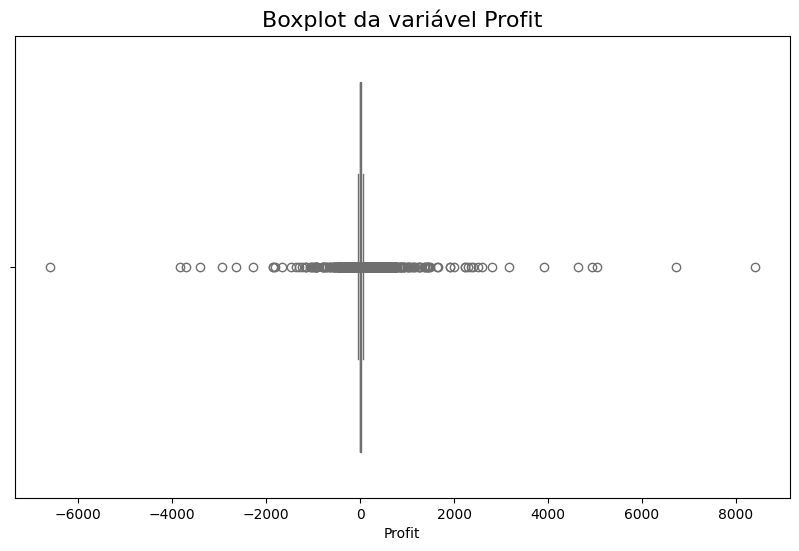

In [6]:
# Box-plot para verificar outliers em Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'], color='skyblue')
plt.title('Boxplot da variável Profit', fontsize=16)
plt.xlabel('Profit')
plt.show()

## Justificativas Limpeza de Dados
- verificamos valores nulos e não havia nenhum
- verificamos duplicatas e nao havia nenhum
- verificamos inconscistencias nos dados e não encontramos nenhuma
- Verificamos outliers e identificamos a presença na variável Profit, porém decidimos não excluir, pois queremos analisar os fatores que levaram a um lucro muito alto, muito baixo ou até mesmo a um prejuízo elevado.
- verificamos valores negativos em variáveis númericas que não podem ser negativas e não encontramos nenhum

### Justificava por ter alterado Datas para Datetime
Converter as colunas de datas para o tipo datetime é essencial, pois permite realizar operações e análises temporais. Com datetime, é possível calcular prazos (como o tempo de entrega), filtrar registros por ano, mês ou dia, e gerar análises sazonais ou de tendências. Além disso, facilita ordenações cronológicas, agrupamentos e evita erros que ocorreriam se as datas fossem tratadas como texto. Isso torna o processo de análise de dados mais eficiente, preciso e flexível.

# Análise Estatística e Visual


In [7]:
estatisticas = df[["Sales", "Quantity", "Discount", "Profit"]].describe()

# Renomear os índices (linhas) para português
estatisticas.rename(index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º_quartil',
    '50%': 'mediana',
    '75%': '3º_quartil',
    'max': 'máximo'
}, inplace=True)

print(estatisticas)

                      Sales     Quantity     Discount       Profit
contagem        9994.000000  9994.000000  9994.000000  9994.000000
média            229.858001     3.789574     0.156203    28.656896
desvio_padrão    623.245101     2.225110     0.206452   234.260108
mínimo             0.444000     1.000000     0.000000 -6599.978000
1º_quartil        17.280000     2.000000     0.000000     1.728750
mediana           54.490000     3.000000     0.200000     8.666500
3º_quartil       209.940000     5.000000     0.200000    29.364000
máximo         22638.480000    14.000000     0.800000  8399.976000


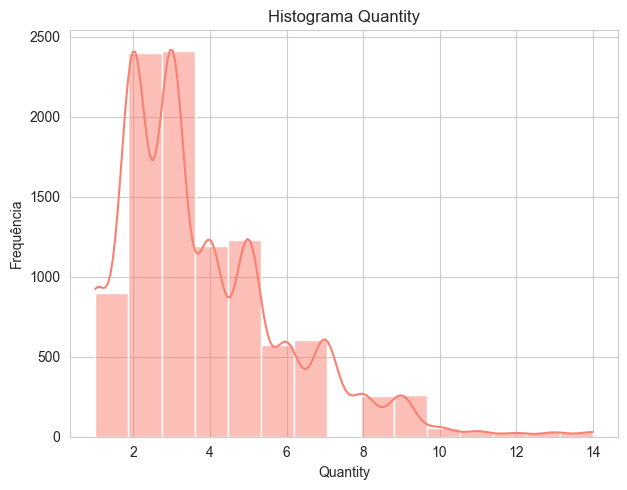

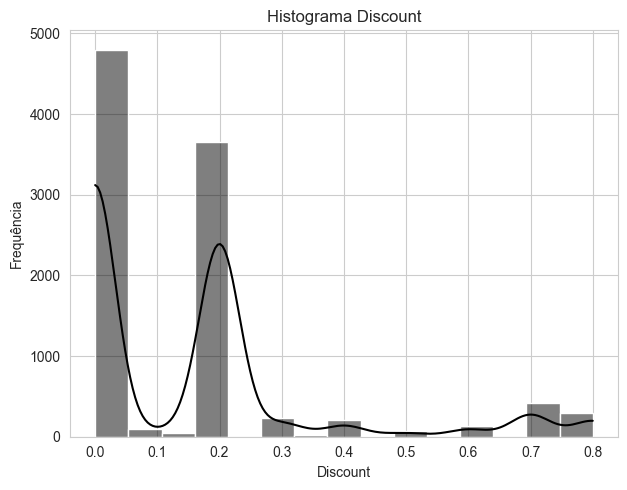

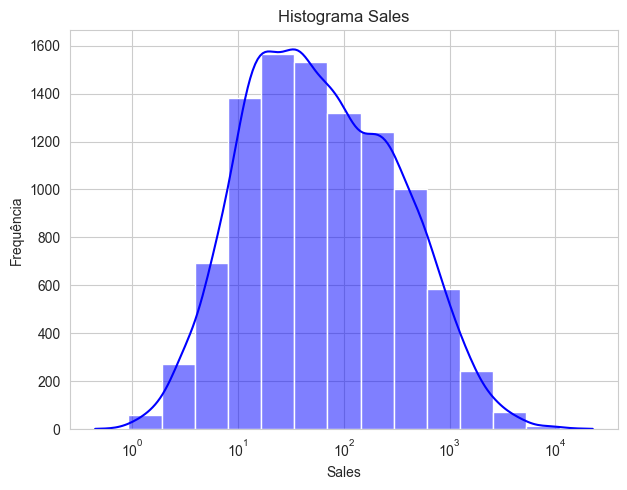

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


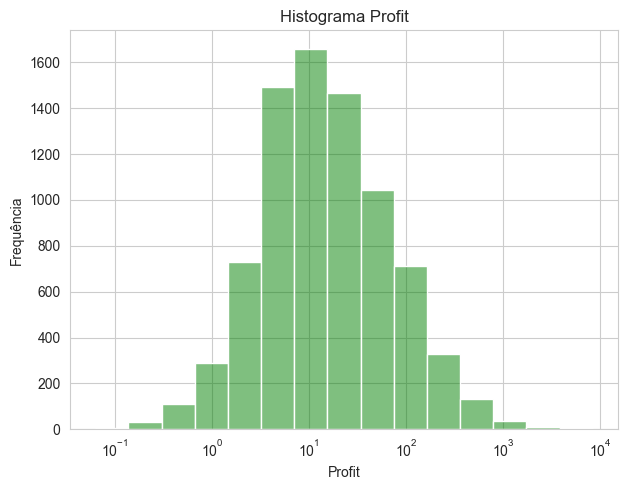

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=15, kde=True, color='salmon')
plt.title('Histograma Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Discount'], bins=15, kde=True, color='black')
plt.title('Histograma Discount')
plt.xlabel('Discount')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Alteramos para escala logaritmica para uma melhor visualização
plt.subplot(1, 2, 2)
sns.histplot(df['Sales'], bins=15, kde=True, color='blue', log_scale=True)
plt.title('Histograma Sales')
plt.xlabel('Sales')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Alteramos para escala logaritmica para uma melhor visualização
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=15, kde=True, color='green', log_scale=True)
plt.title('Histograma Profit')
plt.xlabel('Profit')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

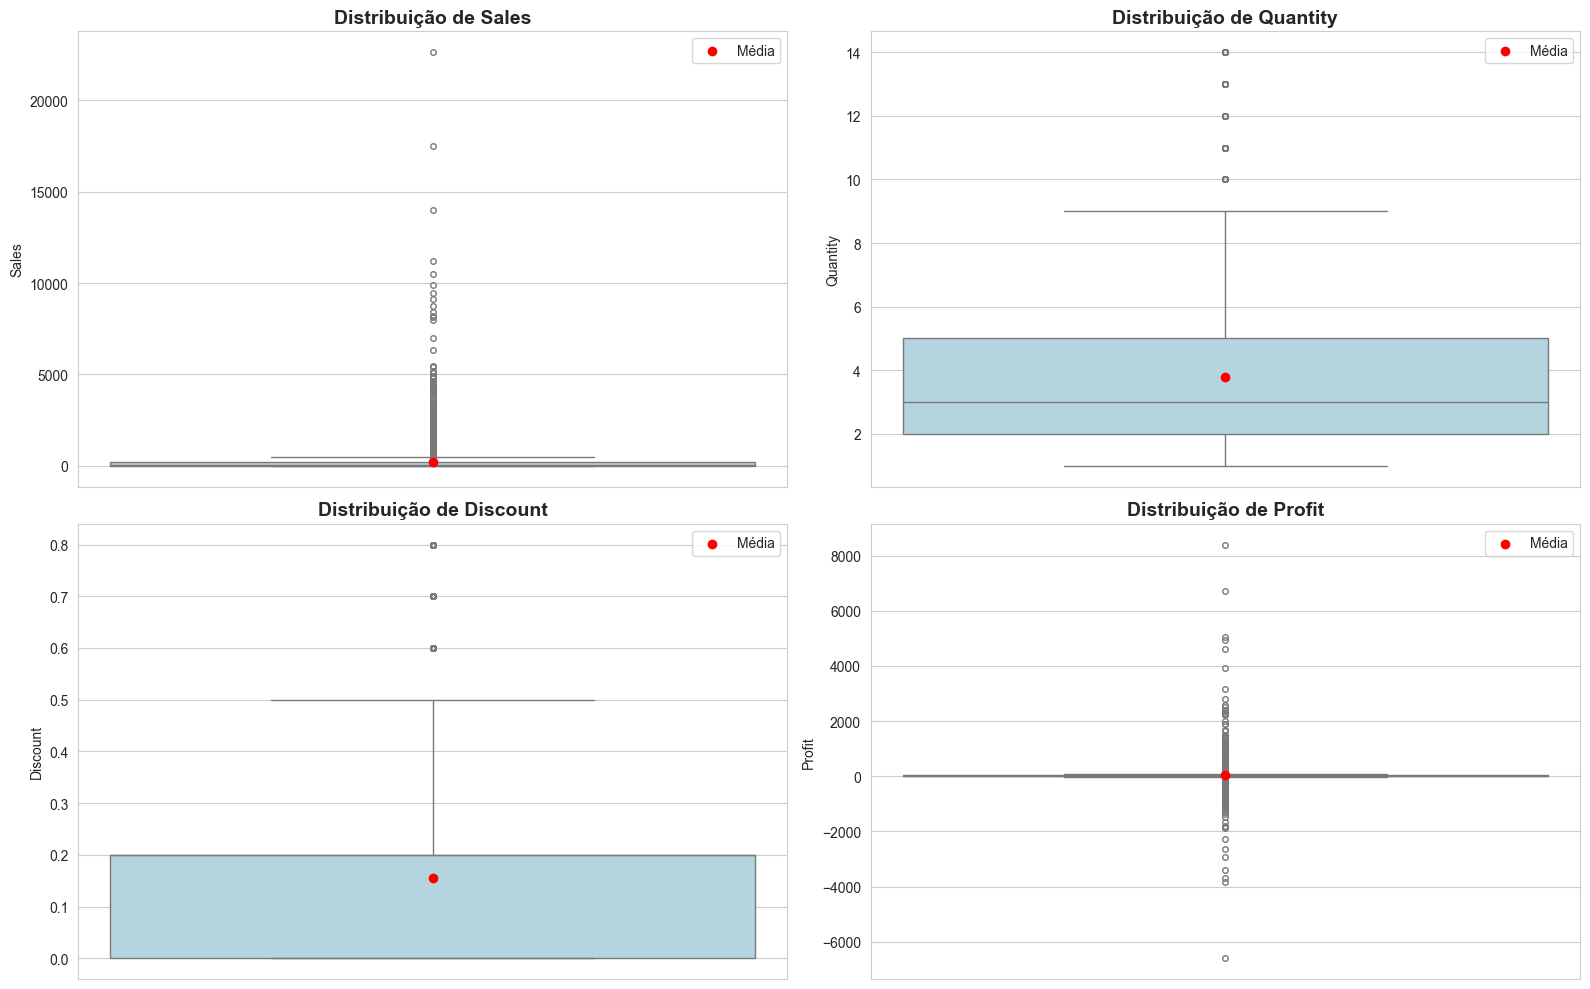

In [46]:
# Definir estilo
sns.set_style("whitegrid")

# Lista de variáveis
variaveis = ["Sales", "Quantity", "Discount", "Profit"]

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Plotar boxplots
for i, var in enumerate(variaveis):
    sns.boxplot(data=df, y=var, ax=axes[i], color='lightblue', width=0.4, fliersize=4)
    mean_val = df[var].mean()
    
    # Adicionar ponto da média
    axes[i].scatter(0, mean_val, color='red', zorder=5, label='Média')
    
    axes[i].set_title(f'Distribuição de {var}', fontsize=14, weight='bold')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('')
    axes[i].legend()

plt.tight_layout()
plt.show()